# Actividad - Estadística básica

* **Nombre:** Michelle Aylin Calzada Montes
* **Matrícula:** A01706202

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [4]:
# Carga las librerías necesarias.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


In [5]:
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [6]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriormente.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [18]:
import random

# Se usó la media ponderada por la variedad de datos existentes y este tipo
# de media nos ayuda a bajar esos pesos

weights = [random.random() for i in range(len(df['User Rating']))]
accWeightedValues = df['User Rating'].values.flatten().dot(weights)
weightedMean = accWeightedValues / sum(weights)
print('Media ponderada User Rating: ', weightedMean)

weights = [random.random() for i in range(len(df['Reviews']))]
accWeightedValues = df['Reviews'].values.flatten().dot(weights)
weightedMean = accWeightedValues / sum(weights)
print('Media ponderada Reviews: ', weightedMean)

weights = [random.random() for i in range(len(df['Price']))]
accWeightedValues = df['Price'].values.flatten().dot(weights)
weightedMean = accWeightedValues / sum(weights)
print('Media ponderada Price: ', weightedMean)

weights = [random.random() for i in range(len(df['Year']))]
accWeightedValues = df['Year'].values.flatten().dot(weights)
weightedMean = accWeightedValues / sum(weights)
print('Media ponderada Year: ', weightedMean)

Media ponderada User Rating:  4.6240088106160115
Media ponderada Reviews:  11722.011561615329
Media ponderada Price:  13.433944149307118
Media ponderada Year:  2014.0654069931268


In [15]:
print('Mediana User Rating:', df['User Rating'].median())
print('Mediana Reviews:', df['Reviews'].median())
print('Mediana Price:', df['Price'].median())
print('Mediana Year:', df['Year'].median())

Mediana User Rating: 4.7
Mediana Reviews: 8580.0
Mediana Price: 11.0
Mediana Year: 2014.0


In [14]:
print('Desviación estándar User Rating: ', df['User Rating'].std())
print('Desviación estándar Reviews: ', df['Reviews'].std())
print('Desviación estándar Price: ', df['Price'].std())
print('Desviación estándar Year: ', df['Year'].std())

Desviación estándar User Rating:  0.22698036502519578
Desviación estándar Reviews:  11731.132017431895
Desviación estándar Price:  10.84226197842238
Desviación estándar Year:  3.165156384169307


Con esos datos puedo decir que el número de Reviews varía un bastante y que hay un promedio de 11722, el User Rating no varía tanto y una gran parte está por encima de 4.5, el precio de los libros varían medianamente y la mayoría de los datos se ubican en el año 2014, 

In [20]:
selected = df[['User Rating', 'Reviews', 'Year','Price', 'Genre']]

selected.corr()

,User Rating,Reviews,Year,Price
User Rating,1.000000,-0.001729,0.242383,-0.133086
Reviews,-0.001729,1.000000,0.263560,-0.109182
Year,0.242383,0.263560,1.000000,-0.153979
Price,-0.133086,-0.109182,-0.153979,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

**Escribe la respuesta**

Las variables relevantes son las de User Rating, Reviews, Price, Genre y Year. Porque pueden decirnos varias cosas sobre como se comportan los datos dependiendo de una clasificación que le demos.

Las variables irrelevantes son las de Name y Author, ya que solo son nombres y esto no nos ayuda a clasificar los datos ni nos dicen nada importante del comportamiento de éstos.

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

El nombre de los libros (Name) y de los autores (Author), porque al ser solo nombres únicos para cada uno, no nos dice nada interesante para el estudio de los datos en conjunto.

* ¿Existen variables que tengan datos extraños?

El número de las Reviews varían en gran cantidad.

* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

Las variables de Reviews y Price tienen rangos muy variados mientras que los demás si son similares. Esto afectará 

* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

Text(0.5, 1.05, 'Distribución de las variables numéricas por género')

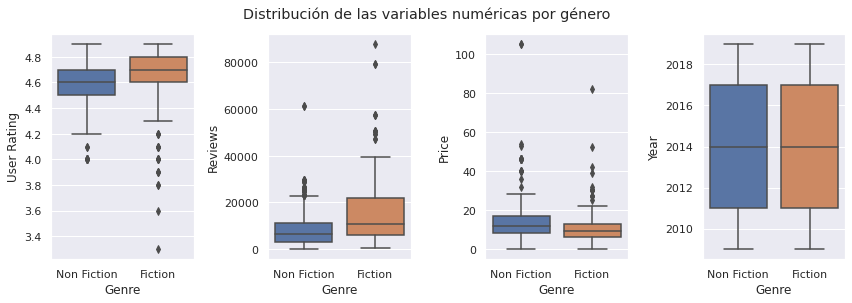

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

sns.boxplot(data=selected, y = 'User Rating', x='Genre', ax=axs[0])
sns.boxplot(data=selected, y = 'Reviews', ax=axs[1], x='Genre')
sns.boxplot(data=selected, y = 'Price', ax=axs[2], x='Genre')
sns.boxplot(data=selected, y = 'Year', ax=axs[3], x='Genre')

# Esta opción es para que se ajusten las imágenes a la cuadrícula
plt.tight_layout()

plt.suptitle('Distribución de las variables numéricas por género', y=1.05)

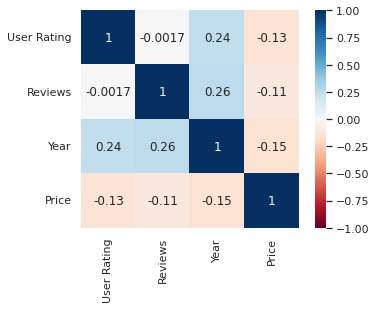

In [24]:
df_corr = selected.corr()
sns.heatmap(data=df_corr, vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)

Text(0.5, 1.05, 'Gráfico de pares de las variables numéricas por género')

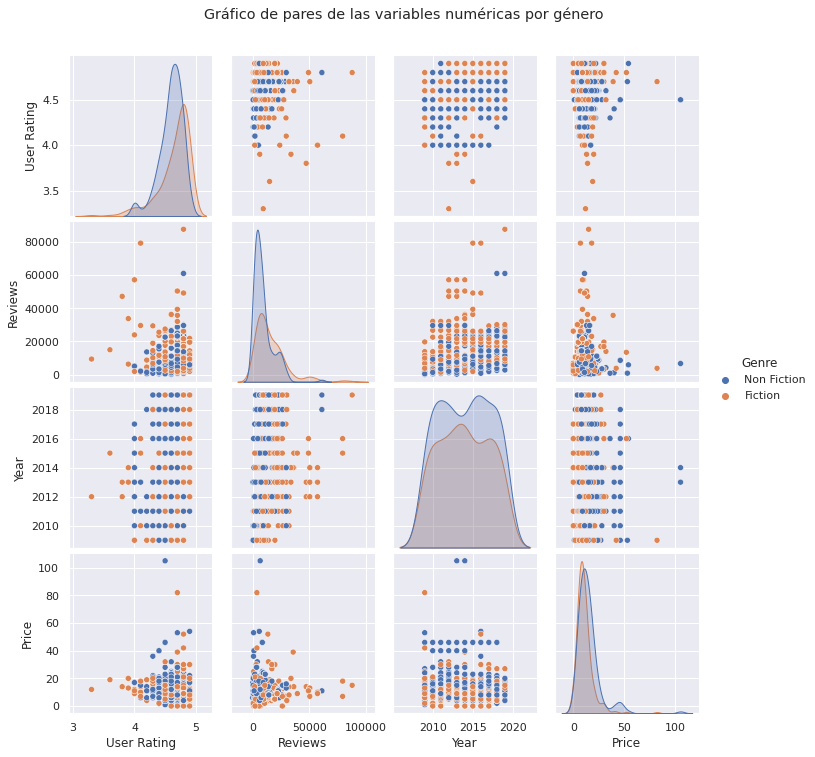

In [26]:
sns.pairplot(data=selected, hue='Genre')
plt.suptitle('Gráfico de pares de las variables numéricas por género', y=1.05)

**Escribe tus conclusiones**

La calificación de los usuarios (User Rating) oscila entre 4 y 5.

Los datos se expanden a través de todo el año, donde hay números que se elevan ligeramente en precios y reviews.

La mayoría de los precios están por debajo de los 40

Y, los reviews suelen ser entre 0 y 4000, y no cambian al compararse con las otras variables

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Si, porque nos ayuda a separar los datos en grupos y enfocarnos en esos para poder sacar más análisis y conclusiones del comportamiento de los datos.

- ¿Cómo obtuviste el valor de $k$ a usar?

Implementé el algoritmo de K-Means para encontrar grupos y encontrar el mejor número, luego use el Método del codo y la métrica de Silhouette Score ára selecionar el mejor número de grupos (k).

- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

Si, porque entre más alto es el valor, significa que hay más grupos y por ende hay más variedad en los datos. Y sería lo contrario si el valor es más bajo.

- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Probablemente aumentarían, ya que eso significa que hay más valores extremos, lo que haría que con esos formaran otros grupos.

- ¿Qué puedes decir de los datos basándose en los centros?

Hay varios datos dispersos y que tienen un rango algo grande.

In [48]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.

from sklearn.preprocessing import StandardScaler


numeric_cols = ['User Rating', 'Reviews',	'Price', 'Year']
X = selected.loc[:, numeric_cols]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,User Rating,Reviews,Price,Year
0,0.359990,0.460453,-0.470810,0.632456
1,-0.080978,-0.844786,0.821609,-0.948683
2,0.359990,0.599440,0.175400,1.264911
3,0.359990,0.808050,-0.655441,0.948683
4,0.800958,-0.365880,-0.101547,1.581139


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

for k in grupos:
    model = KMeans(n_clusters=k, random_state = 47)

    clusters = model.fit_predict(X_norm)

    wcss.append(model.inertia_)

    sil_score.append(silhouette_score(X_norm, clusters))

Text(0.5, 1.0, 'Silhouette Score')

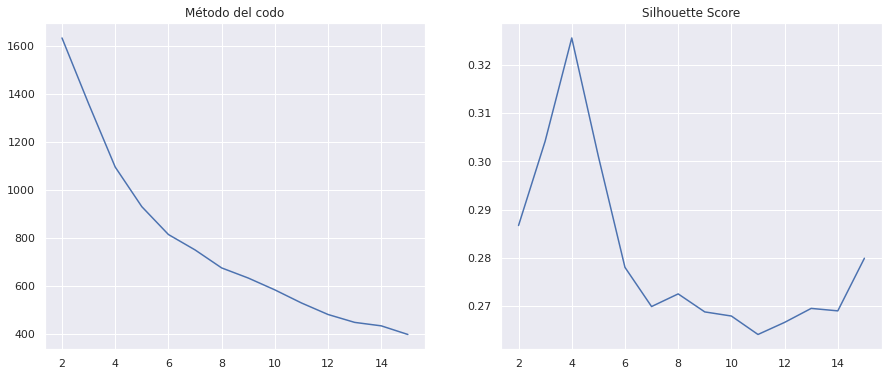

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

Aquí podemos ver que el pico es 4, así que ese es el número de clusters que vamos a utilizar

In [51]:
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)

selected['Grupo'] = clusters.astype('str')
selected.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,User Rating,Reviews,Year,Price,Genre,Grupo
0,4.7,17350,2016,8,Non Fiction,3
1,4.6,2052,2011,22,Fiction,1
2,4.7,18979,2018,15,Non Fiction,3
3,4.7,21424,2017,6,Fiction,3
4,4.8,7665,2019,12,Non Fiction,3


In [55]:
selected.groupby('Grupo').mean()


,User Rating,Reviews,Year,Price
Grupo,,,,
0,4.362500,49948.125000,2014.666667,12.375000
1,4.537991,6761.358079,2011.109170,12.890830
2,4.538462,7219.538462,2012.846154,49.692308
3,4.716605,13429.856089,2016.494465,9.830258


Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

Grupo 0 = Grupo 2014
Grupo 1 = Grupo 2011
Grupo 2 = Grupo 2012
Grupo 3 = Grupo 2016

**Escribe la respuesta**



In [56]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.

selected.groupby('Grupo').mean()

,User Rating,Reviews,Year,Price
Grupo,,,,
0,4.362500,49948.125000,2014.666667,12.375000
1,4.537991,6761.358079,2011.109170,12.890830
2,4.538462,7219.538462,2012.846154,49.692308
3,4.716605,13429.856089,2016.494465,9.830258


El grupo 2014: con el rating más bajo y reviews medianamente altas

El grupo 2011: con el menor número de reviews, user ratings y precios medianos

El grupo 2012: con el número de reviews cercano a los más bajos y con precios más elevados

El grupo 2016: con el rating más alto, con el mayor número de reviews y con los precios más bajos

Text(0.5, 1.05, '4 grupos de reseñas')

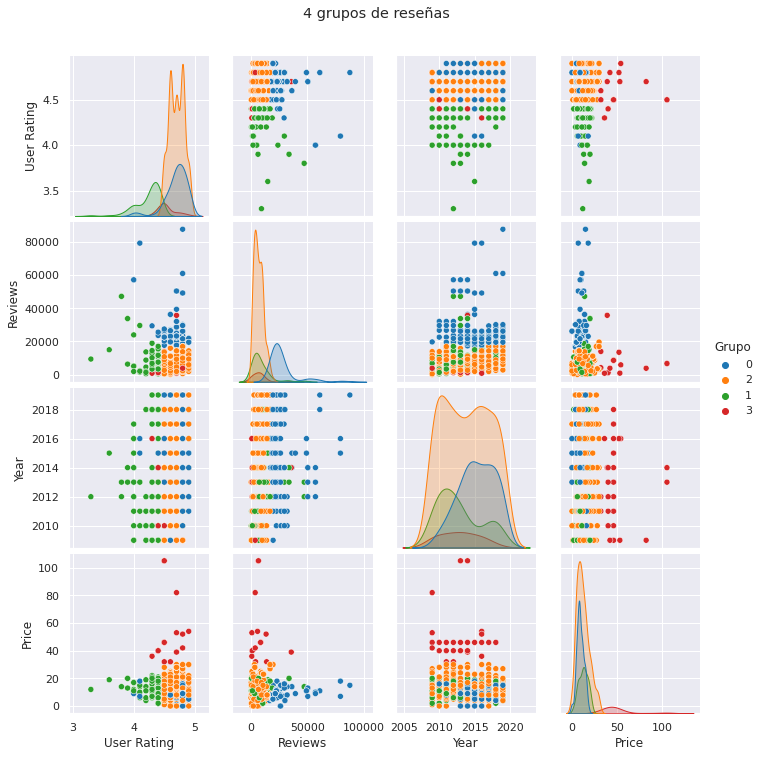

In [46]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.

sns.pairplot(data=selected, hue='Grupo', palette='tab10')
plt.suptitle('4 grupos de reseñas', y=1.05)

In [47]:
# Relación entre User rating y Reviews por Price

import plotly.express as px

fig = px.scatter_3d(selected, x = 'User Rating', y = 'Reviews', 
                    z = 'Price', 
                    title='4 grupos de reseñas',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()

In [52]:
# Relación entre User rating y Reviews por Year

import plotly.express as px

fig = px.scatter_3d(selected, x = 'User Rating', y = 'Reviews', 
                    z = 'Year', 
                    title='4 grupos de reseñas',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()

In [53]:
# Relación entre Price y Reviews por Year

import plotly.express as px

fig = px.scatter_3d(selected, x = 'Price', y = 'Reviews', 
                    z = 'Year', 
                    title='4 grupos de reseñas',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()

**Link del repositorio:** https://github.com/A01706202/SemanaTec.git